<a href="https://colab.research.google.com/github/fasnaah/laptop-price-prediction/blob/main/laptop_price_pred2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laptop Price**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/laptop_data.csv')
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [ ]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
df.tail()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [ ]:
df.shape

(1303, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [ ]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [ ]:
df.dtypes

Unnamed: 0            int64
Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

In [ ]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [ ]:
df.isna().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [ ]:
for col in df.columns:
  print(col)
  print(df[col].nunique())
  print(df[col].value_counts())
  print('-'*100)

Unnamed: 0
1303
Unnamed: 0
0       1
856     1
874     1
873     1
872     1
       ..
433     1
432     1
431     1
430     1
1302    1
Name: count, Length: 1303, dtype: int64
----------------------------------------------------------------------------------------------------
Company
19
Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
TypeName
6
TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64
---------------------------------------------------

# **visualization**

<ipython-input-13-14d665cce46d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=i,y='Price',data=df,palette=['black','#62FF00'])
<ipython-input-13-14d665cce46d>:5: UserWarning: 
The palette list has fewer values (2) than needed (19) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=i,y='Price',data=df,palette=['black','#62FF00'])
<ipython-input-13-14d665cce46d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=i,y='Price',data=df,palette=['black','#62FF00'])
<ipython-input-13-14d665cce46d>:5: UserWarning: 
The palette list has fewer values (2) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=i,y='Price',data=df,palette=

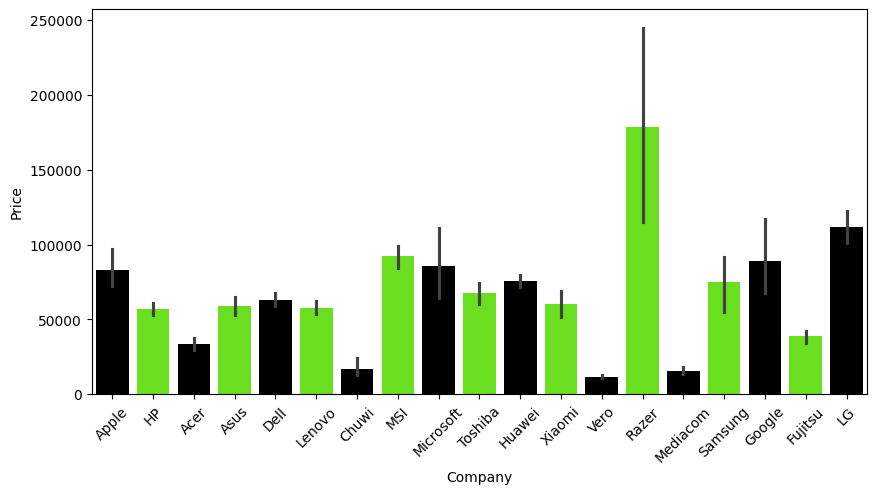

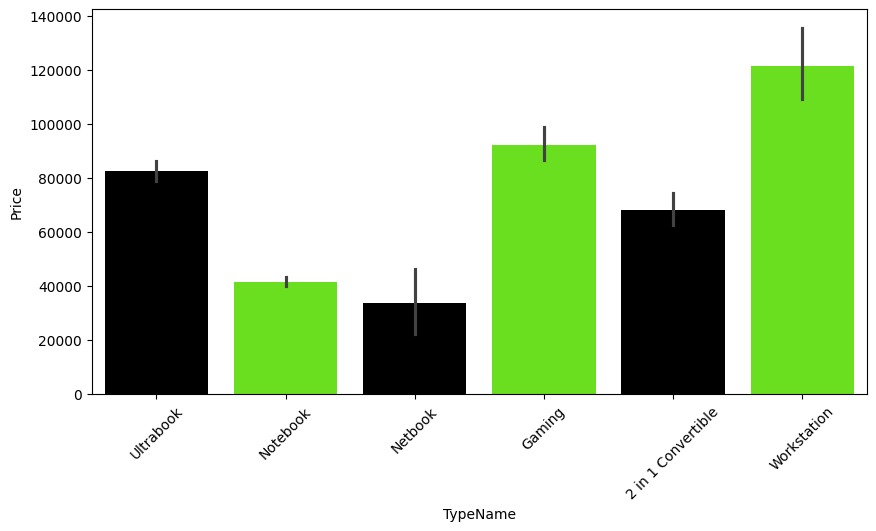

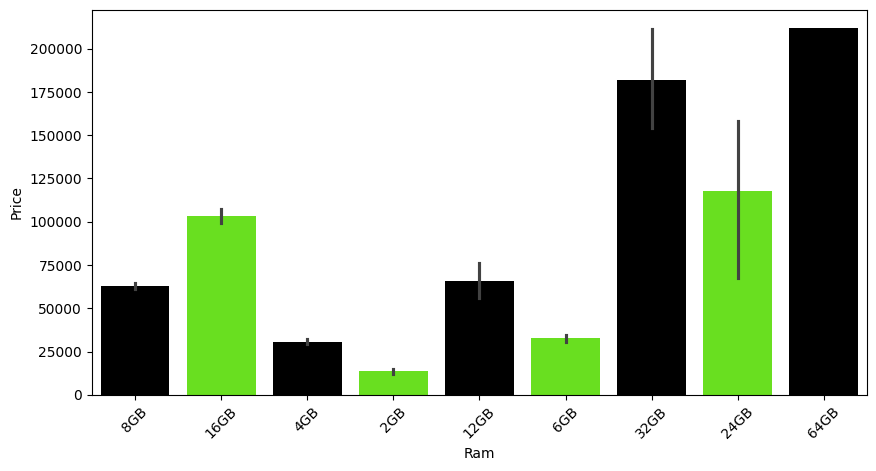

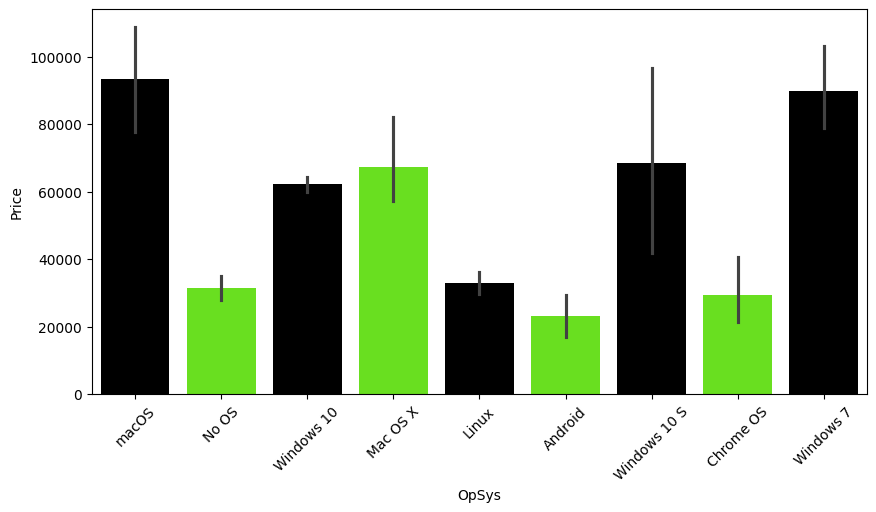

In [ ]:
cat_col= ['Company','TypeName','Ram','OpSys']

for i in cat_col:
  plt.figure(figsize=(10,5))
  sns.barplot(x=i,y='Price',data=df,palette=['black','#62FF00'])
  plt.xticks(rotation=45)







# **feature selection**

In [ ]:
df1=df.copy()
#Label encoding before feature selection
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df1.columns:
  df1[col]=le.fit_transform(df1[col])
df1

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,1,4,7,23,65,8,4,58,8,38,524
1,1,1,4,7,1,63,8,2,51,8,35,342
2,2,7,3,14,8,74,8,16,53,4,74,168
3,3,1,4,13,25,85,1,29,9,8,71,745
4,4,1,4,7,23,67,8,16,59,8,38,637
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,10,0,10,13,89,5,4,47,5,78,200
1299,1299,10,0,7,19,89,1,29,47,5,41,575
1300,1300,10,3,10,0,34,3,35,40,5,56,8
1301,1301,7,3,14,0,89,7,10,21,5,104,265


In [ ]:
x_category=df1[['Company', 'TypeName', 'Ram', 'OpSys']]
x_continuous=df1[['Unnamed: 0' ,	'Inches'	,'ScreenResolution' 	,'Cpu' ,	'Memory' ,	'Gpu' ,	'Weight']]
y1=df1['Price']


**chi square test**

In [ ]:
#Chi Square Test for feature selection in case of categorical input labels
from sklearn.feature_selection import chi2
score1=chi2(x_category,y1)
score1

(array([2226.71337692,  490.49048703, 1075.07303935,  209.65565121]),
 array([6.73290278e-137, 1.00000000e+000, 4.86165374e-011, 1.00000000e+000]))

In [ ]:

f_value1=pd.Series(score1[0],index=x_category.columns)
f_value1.sort_values(ascending=False)



Company     2226.713377
Ram         1075.073039
TypeName     490.490487
OpSys        209.655651
dtype: float64

In [ ]:

p_value1=pd.Series(score1[1],index=x_category.columns)
p_value1.sort_values(ascending=False)


TypeName     1.000000e+00
OpSys        1.000000e+00
Ram          4.861654e-11
Company     6.732903e-137
dtype: float64

**annova test**

In [ ]:

#Annova Test for feature selection in case of continuous input labels
from sklearn.feature_selection import f_classif
score2=f_classif(x_continuous,y1)
score2


(array([1.17931562, 1.24964109, 1.69335238, 1.93797601, 1.3847847 ,
        1.55824266, 1.19704659]),
 array([2.08746392e-02, 3.01451309e-03, 7.65542048e-11, 7.11477872e-16,
        3.22869356e-05, 3.07718341e-08, 1.32315452e-02]))

In [ ]:

f_value2=pd.Series(score2[0],index=x_continuous.columns)
f_value2.sort_values(ascending=False)


Cpu                 1.937976
ScreenResolution    1.693352
Gpu                 1.558243
Memory              1.384785
Inches              1.249641
Weight              1.197047
Unnamed: 0          1.179316
dtype: float64

In [ ]:

p_value2=pd.Series(score2[1],index=x_continuous.columns)
p_value2.sort_values(ascending=False)


Unnamed: 0          2.087464e-02
Weight              1.323155e-02
Inches              3.014513e-03
Memory              3.228694e-05
Gpu                 3.077183e-08
ScreenResolution    7.655420e-11
Cpu                 7.114779e-16
dtype: float64

Significant Features:

    .  Company and Ram from the categorical features are highly significant.
    .  Cpu, ScreenResolution, Gpu, Memory, Inches, and Weight from the continuous features are significant.

Less Significant Features:

    .  TypeName and OpSys from the categorical features have p-values of 1.0, indicating no significant relationship with Price.
    .  Unnamed: 0 from the continuous features is the least significant but still has a relationship with Price

# **preprocessing**

In [ ]:
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [ ]:

df
df['Company'].value_counts()


Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

<Axes: xlabel='Company'>

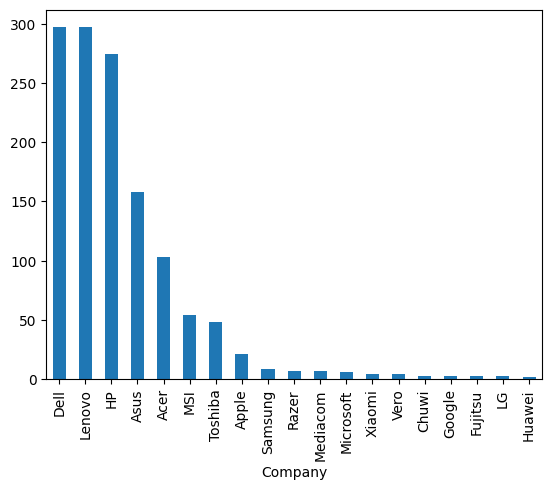

In [ ]:
df['Company'].value_counts().plot(kind='bar')


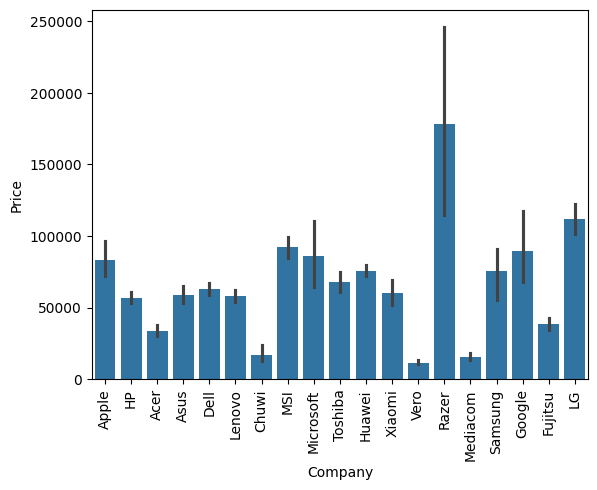

In [ ]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df=df.join (pd.get_dummies(df['Company'],dtype=int))
df=df.drop('Company',axis=1)
df





,Unnamed: 0,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi
0,0,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,...,0,0,0,0,0,0,0,0,0,0
1,1,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,...,0,0,0,0,0,0,0,0,0,0
2,2,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,...,0,0,0,0,0,0,0,0,0,0
3,3,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,...,0,0,0,0,0,0,0,0,0,0
4,4,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,...,0,1,0,0,0,0,0,0,0,0
1299,1299,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,...,0,1,0,0,0,0,0,0,0,0
1300,1300,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,...,0,1,0,0,0,0,0,0,0,0
1301,1301,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,...,0,0,0,0,0,0,0,0,0,0


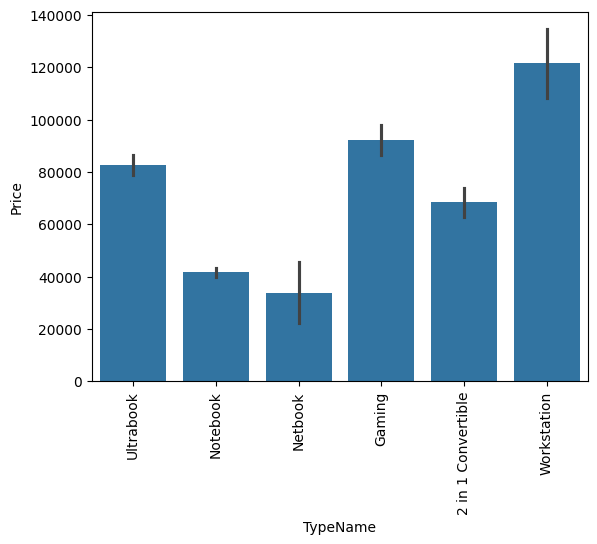

In [ ]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:

df=df.join (pd.get_dummies(df['TypeName'],dtype=int))
df=df.drop('TypeName',axis=1)

df

,Unnamed: 0,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,...,Samsung,Toshiba,Vero,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
0,0,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,...,0,0,0,0,0,0,0,0,1,0
1,1,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,...,0,0,0,0,0,0,0,0,1,0
2,2,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,...,0,0,0,0,0,0,0,1,0,0
3,3,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,...,0,0,0,0,0,0,0,0,1,0
4,4,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,...,0,0,0,0,1,0,0,0,0,0
1299,1299,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,...,0,0,0,0,1,0,0,0,0,0
1300,1300,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,...,0,0,0,0,0,0,0,1,0,0
1301,1301,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)


<Axes: xlabel='Touchscreen', ylabel='Price'>

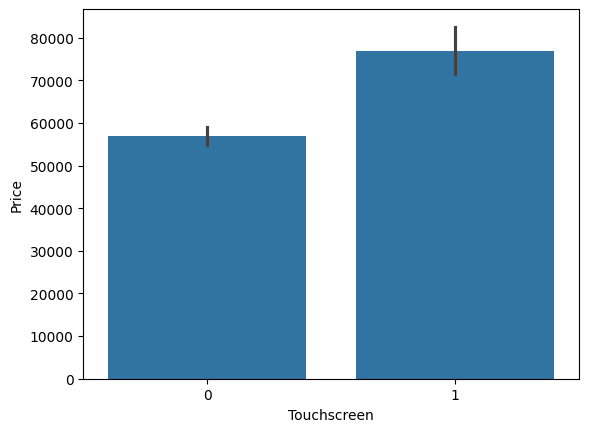

In [ ]:
# df['Touchscreen'].value_counts().plot(kind='bar')
sns.barplot(x=df['Touchscreen'],y=df['Price'])


In [ ]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)


<Axes: xlabel='Ips', ylabel='Price'>

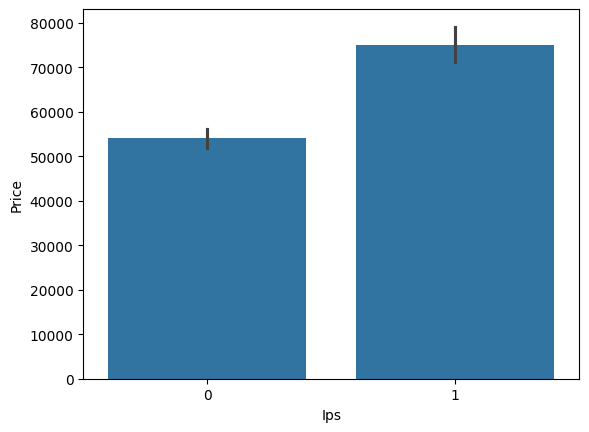

In [ ]:
sns.barplot(x=df['Ips'],y=df['Price'])

In [ ]:
df['ScreenResolution']=df.ScreenResolution.str.split(' ').apply(lambda x:x[-1])
df['ScreenResolution'].value_counts()




ScreenResolution
1920x1080    841
1366x768     308
3840x2160     43
3200x1800     27
2560x1440     23
1600x900      23
2560x1600      6
2304x1440      6
2256x1504      6
1920x1200      5
1440x900       4
2880x1800      4
2400x1600      4
2160x1440      2
2736x1824      1
Name: count, dtype: int64

In [ ]:

df['screen_width']=df.ScreenResolution.str.split('x').apply(lambda x:x[0])
df['screen_height']=df.ScreenResolution.str.split('x').apply(lambda x:x[1])

df['screen_width']=df['screen_width'].astype(int)
df['screen_height']=df['screen_height'].astype(int)

df=df.drop('ScreenResolution',axis=1)


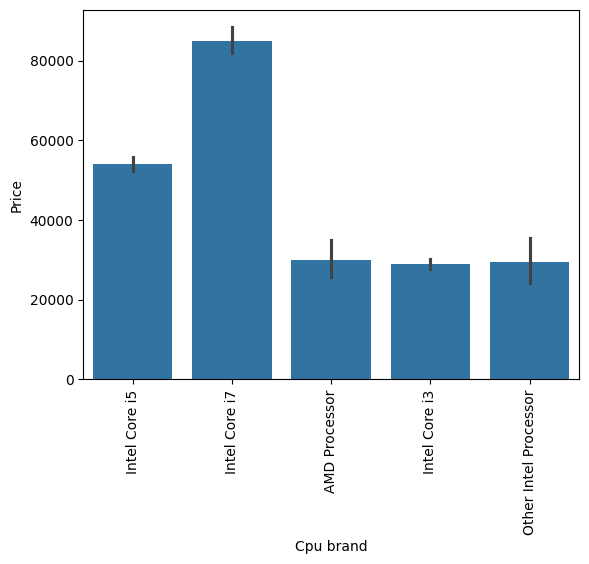

In [ ]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:




# df['Cpu_brand']=df.Cpu.str.split(' ').apply(lambda x:x[0])
df['Cpu_freq']=df.Cpu.str.split(' ').apply(lambda x: x[-1])


df['Cpu_freq']=df['Cpu_freq'].str.replace('GHz',' ')
df['Cpu_freq']=df['Cpu_freq'].astype(float)

df=df.drop('Cpu',axis=1)
df



,Unnamed: 0,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Acer,Apple,...,Notebook,Ultrabook,Workstation,Touchscreen,Ips,screen_width,screen_height,Cpu Name,Cpu brand,Cpu_freq
0,0,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,...,0,1,0,0,1,2560,1600,Intel Core i5,Intel Core i5,2.3
1,1,13.3,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,1,...,0,1,0,0,0,1440,900,Intel Core i5,Intel Core i5,1.8
2,2,15.6,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,...,1,0,0,0,0,1920,1080,Intel Core i5,Intel Core i5,2.5
3,3,15.4,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,...,0,1,0,0,1,2880,1800,Intel Core i7,Intel Core i7,2.7
4,4,13.3,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,...,0,1,0,0,1,2560,1600,Intel Core i5,Intel Core i5,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,14.0,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,0,0,...,0,0,0,1,1,1920,1080,Intel Core i7,Intel Core i7,2.5
1299,1299,13.3,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,0,0,...,0,0,0,1,1,3200,1800,Intel Core i7,Intel Core i7,2.5
1300,1300,14.0,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,0,0,...,1,0,0,0,0,1366,768,Intel Celeron Dual,Other Intel Processor,1.6
1301,1301,15.6,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,0,0,...,1,0,0,0,0,1366,768,Intel Core i7,Intel Core i7,2.5


In [ ]:



df['Ram']=df['Ram'].str.replace('GB','')
df['Ram']=df['Ram'].astype(int)

df['Weight']=df['Weight'].str.replace('kg','')
df['Weight']=df['Weight'].astype(float)

df



,Unnamed: 0,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Acer,Apple,...,Notebook,Ultrabook,Workstation,Touchscreen,Ips,screen_width,screen_height,Cpu Name,Cpu brand,Cpu_freq
0,0,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,0,1,0,0,1,2560,1600,Intel Core i5,Intel Core i5,2.3
1,1,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1,...,0,1,0,0,0,1440,900,Intel Core i5,Intel Core i5,1.8
2,2,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,1,0,0,0,0,1920,1080,Intel Core i5,Intel Core i5,2.5
3,3,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,0,1,0,0,1,2880,1800,Intel Core i7,Intel Core i7,2.7
4,4,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,0,1,0,0,1,2560,1600,Intel Core i5,Intel Core i5,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,14.0,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,0,0,...,0,0,0,1,1,1920,1080,Intel Core i7,Intel Core i7,2.5
1299,1299,13.3,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,0,0,...,0,0,0,1,1,3200,1800,Intel Core i7,Intel Core i7,2.5
1300,1300,14.0,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,...,1,0,0,0,0,1366,768,Intel Celeron Dual,Other Intel Processor,1.6
1301,1301,15.6,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,...,1,0,0,0,0,1366,768,Intel Core i7,Intel Core i7,2.5


In [ ]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
df

,Unnamed: 0,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Acer,Apple,...,Notebook,Ultrabook,Workstation,Touchscreen,Ips,screen_width,screen_height,Cpu Name,Cpu brand,Cpu_freq
0,0,13.3,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,0,1,0,0,1,2560,1600,Intel Core i5,Intel Core i5,2.3
1,1,13.3,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1,...,0,1,0,0,0,1440,900,Intel Core i5,Intel Core i5,1.8
2,2,15.6,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,1,0,0,0,0,1920,1080,Intel Core i5,Intel Core i5,2.5
3,3,15.4,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,0,1,0,0,1,2880,1800,Intel Core i7,Intel Core i7,2.7
4,4,13.3,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,0,1,0,0,1,2560,1600,Intel Core i5,Intel Core i5,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,14.0,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,0,0,...,0,0,0,1,1,1920,1080,Intel Core i7,Intel Core i7,2.5
1299,1299,13.3,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,0,0,...,0,0,0,1,1,3200,1800,Intel Core i7,Intel Core i7,2.5
1300,1300,14.0,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,...,1,0,0,0,0,1366,768,Intel Celeron Dual,Other Intel Processor,1.6
1301,1301,15.6,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,...,1,0,0,0,0,1366,768,Intel Core i7,Intel Core i7,2.5


In [ ]:
new = df["Memory"].str.split("+", n = 1, expand = True)

new

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [ ]:
df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)
df


,Unnamed: 0,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Acer,Apple,...,screen_height,Cpu Name,Cpu brand,Cpu_freq,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
0,0,13.3,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,1600,Intel Core i5,Intel Core i5,2.3,128 SSD,None,0,1,0,0
1,1,13.3,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1,...,900,Intel Core i5,Intel Core i5,1.8,128 Flash Storage,None,0,0,0,1
2,2,15.6,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,1080,Intel Core i5,Intel Core i5,2.5,256 SSD,None,0,1,0,0
3,3,15.4,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,1800,Intel Core i7,Intel Core i7,2.7,512 SSD,None,0,1,0,0
4,4,13.3,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,1600,Intel Core i5,Intel Core i5,3.1,256 SSD,None,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,14.0,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,0,0,...,1080,Intel Core i7,Intel Core i7,2.5,128 SSD,None,0,1,0,0
1299,1299,13.3,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,0,0,...,1800,Intel Core i7,Intel Core i7,2.5,512 SSD,None,0,1,0,0
1300,1300,14.0,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,...,768,Intel Celeron Dual,Other Intel Processor,1.6,64 Flash Storage,None,0,0,0,1
1301,1301,15.6,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,...,768,Intel Core i7,Intel Core i7,2.5,1000 HDD,None,1,0,0,0


In [ ]:
df['first'] = df['first'].str.replace(r'\D', '')

df

,Unnamed: 0,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Acer,Apple,...,screen_height,Cpu Name,Cpu brand,Cpu_freq,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
0,0,13.3,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,1600,Intel Core i5,Intel Core i5,2.3,128 SSD,None,0,1,0,0
1,1,13.3,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1,...,900,Intel Core i5,Intel Core i5,1.8,128 Flash Storage,None,0,0,0,1
2,2,15.6,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,1080,Intel Core i5,Intel Core i5,2.5,256 SSD,None,0,1,0,0
3,3,15.4,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,1800,Intel Core i7,Intel Core i7,2.7,512 SSD,None,0,1,0,0
4,4,13.3,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,1600,Intel Core i5,Intel Core i5,3.1,256 SSD,None,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,14.0,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,0,0,...,1080,Intel Core i7,Intel Core i7,2.5,128 SSD,None,0,1,0,0
1299,1299,13.3,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,0,0,...,1800,Intel Core i7,Intel Core i7,2.5,512 SSD,None,0,1,0,0
1300,1300,14.0,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,...,768,Intel Celeron Dual,Other Intel Processor,1.6,64 Flash Storage,None,0,0,0,1
1301,1301,15.6,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,...,768,Intel Core i7,Intel Core i7,2.5,1000 HDD,None,1,0,0,0


In [ ]:
df["second"].fillna("0", inplace = True)

df["second"].value_counts()

second
0                1095
  1000 HDD        185
  2000 HDD         15
  256 SSD           3
  500 HDD           2
  1000 Hybrid       2
  512 SSD           1
Name: count, dtype: int64

In [ ]:
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df

,Unnamed: 0,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Acer,Apple,...,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
0,0,13.3,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128 SSD,0,0,1,0,0,0,0,0,0
1,1,13.3,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1,...,128 Flash Storage,0,0,0,0,1,0,0,0,0
2,2,15.6,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,256 SSD,0,0,1,0,0,0,0,0,0
3,3,15.4,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,512 SSD,0,0,1,0,0,0,0,0,0
4,4,13.3,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,256 SSD,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,14.0,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,0,0,...,128 SSD,0,0,1,0,0,0,0,0,0
1299,1299,13.3,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,0,0,...,512 SSD,0,0,1,0,0,0,0,0,0
1300,1300,14.0,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,...,64 Flash Storage,0,0,0,0,1,0,0,0,0
1301,1301,15.6,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,...,1000 HDD,0,1,0,0,0,0,0,0,0


In [ ]:

df['second'] = df['second'].str.replace(r'\D', '', regex=True)



In [ ]:
# df['second'] = df['second'].str.replace(r'\D', '')

# df["first"] = df["first"].astype(int)
# df["second"] = df["second"].astype(int)

# df

In [ ]:
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df["first"]

0                 128 SSD
1       128 Flash Storage
2                 256 SSD
3                 512 SSD
4                 256 SSD
              ...        
1298              128 SSD
1299              512 SSD
1300     64 Flash Storage
1301             1000 HDD
1302              500 HDD
Name: first, Length: 1303, dtype: object

In [ ]:
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)
df

,Unnamed: 0,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Acer,Apple,...,Ips,screen_width,screen_height,Cpu Name,Cpu brand,Cpu_freq,HDD,SSD,Hybrid,Flash_Storage
0,0,13.3,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,1,2560,1600,Intel Core i5,Intel Core i5,2.3,,128 SSD,,
1,1,13.3,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1,...,0,1440,900,Intel Core i5,Intel Core i5,1.8,,,,128 Flash Storage
2,2,15.6,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,0,1920,1080,Intel Core i5,Intel Core i5,2.5,,256 SSD,,
3,3,15.4,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,1,2880,1800,Intel Core i7,Intel Core i7,2.7,,512 SSD,,
4,4,13.3,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,1,2560,1600,Intel Core i5,Intel Core i5,3.1,,256 SSD,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,14.0,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,0,0,...,1,1920,1080,Intel Core i7,Intel Core i7,2.5,,128 SSD,,
1299,1299,13.3,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,0,0,...,1,3200,1800,Intel Core i7,Intel Core i7,2.5,,512 SSD,,
1300,1300,14.0,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,...,0,1366,768,Intel Celeron Dual,Other Intel Processor,1.6,,,,64 Flash Storage
1301,1301,15.6,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,...,0,1366,768,Intel Core i7,Intel Core i7,2.5,1000 HDD,,,


In [ ]:
df.isna().sum()

Unnamed: 0            0
Inches                0
Ram                   0
Memory                0
Gpu                   0
OpSys                 0
Weight                0
Price                 0
Acer                  0
Apple                 0
Asus                  0
Chuwi                 0
Dell                  0
Fujitsu               0
Google                0
HP                    0
Huawei                0
LG                    0
Lenovo                0
MSI                   0
Mediacom              0
Microsoft             0
Razer                 0
Samsung               0
Toshiba               0
Vero                  0
Xiaomi                0
2 in 1 Convertible    0
Gaming                0
Netbook               0
Notebook              0
Ultrabook             0
Workstation           0
Touchscreen           0
Ips                   0
screen_width          0
screen_height         0
Cpu Name              0
Cpu brand             0
Cpu_freq              0
HDD                   0
SSD             

In [ ]:


# df['Memory_amount']=df['Memory'].str.split(' ').apply(lambda x: x[0])
# df['Memory_type']=df['Memory'].str.split(' ').apply(lambda x: x[1])




In [ ]:
# df['Memory_amount'].value_counts()

In [ ]:
#here we can see that in memory amount there is TB and GB. so we are converting this to MB


# m_lst = []

# for i in df['Memory_amount']:
#     if 'GB' in i:
#         mb_value = float(i.replace('GB', '').strip()) * 1024
#     elif 'TB' in i:
#         mb_value = float(i.replace('TB', '').strip()) * 1024 * 1024
#     m_lst.append(mb_value)

# df['Memory_amount'] = m_lst



# # df=df.drop('Memory',axis=1)



In [ ]:


# df=df.join(pd.get_dummies(df['Memory_type'],dtype=int))
# df=df.drop('Memory_type',axis=1)

# df

In [ ]:
df['Memory'].value_counts()

Memory
256 SSD                         412
1000 HDD                        224
500 HDD                         132
512 SSD                         118
128 SSD +  1000 HDD              94
128 SSD                          76
256 SSD +  1000 HDD              73
32 Flash Storage                 38
2000 HDD                         16
64 Flash Storage                 15
512 SSD +  1000 HDD              14
1000 SSD                         14
256 SSD +  2000 HDD              10
1000 Hybrid                       9
256 Flash Storage                 8
16 Flash Storage                  7
32 SSD                            6
180 SSD                           5
128 Flash Storage                 4
512 SSD +  2000 HDD               3
16 SSD                            3
512 Flash Storage                 2
1000 SSD +  1000 HDD              2
256 SSD +  500 HDD                2
128 SSD +  2000 HDD               2
256 SSD +  256 SSD                2
512 SSD +  256 SSD                1
512 SSD +  512 SSD   

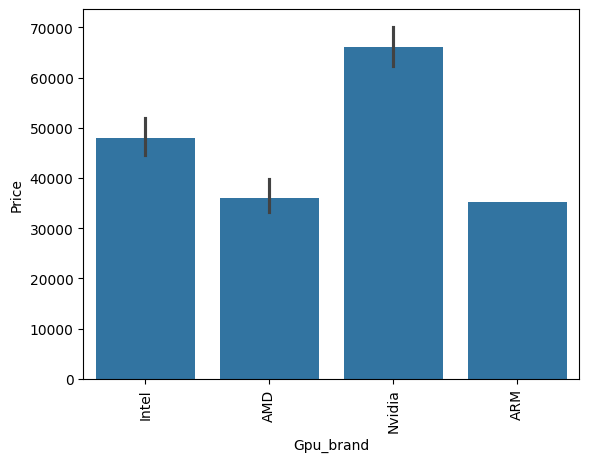

,Unnamed: 0,Inches,Ram,Memory,OpSys,Weight,Price,Acer,Apple,Asus,...,screen_width,screen_height,Cpu Name,Cpu brand,Cpu_freq,HDD,SSD,Hybrid,Flash_Storage,Gpu_brand
0,0,13.3,8,128 SSD,macOS,1.37,71378.6832,0,1,0,...,2560,1600,Intel Core i5,Intel Core i5,2.3,,128 SSD,,,Intel
1,1,13.3,8,128 Flash Storage,macOS,1.34,47895.5232,0,1,0,...,1440,900,Intel Core i5,Intel Core i5,1.8,,,,128 Flash Storage,Intel
2,2,15.6,8,256 SSD,No OS,1.86,30636.0000,0,0,0,...,1920,1080,Intel Core i5,Intel Core i5,2.5,,256 SSD,,,Intel
3,3,15.4,16,512 SSD,macOS,1.83,135195.3360,0,1,0,...,2880,1800,Intel Core i7,Intel Core i7,2.7,,512 SSD,,,AMD
4,4,13.3,8,256 SSD,macOS,1.37,96095.8080,0,1,0,...,2560,1600,Intel Core i5,Intel Core i5,3.1,,256 SSD,,,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,14.0,4,128 SSD,Windows 10,1.80,33992.6400,0,0,0,...,1920,1080,Intel Core i7,Intel Core i7,2.5,,128 SSD,,,Intel
1299,1299,13.3,16,512 SSD,Windows 10,1.30,79866.7200,0,0,0,...,3200,1800,Intel Core i7,Intel Core i7,2.5,,512 SSD,,,Intel
1300,1300,14.0,2,64 Flash Storage,Windows 10,1.50,12201.1200,0,0,0,...,1366,768,Intel Celeron Dual,Other Intel Processor,1.6,,,,64 Flash Storage,Intel
1301,1301,15.6,6,1000 HDD,Windows 10,2.19,40705.9200,0,0,0,...,1366,768,Intel Core i7,Intel Core i7,2.5,1000 HDD,,,,AMD


In [ ]:
df['Gpu_brand']=df['Gpu'].str.split(' ').apply(lambda x:x[0])
# df=df.drop('Gpu',axis=1)
# df = df[df['Gpu_brand'] != 'ARM']
sns.barplot(x=df['Gpu_brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()
df.drop(columns=['Gpu'],inplace=True)

df

In [ ]:

df=df.join(pd.get_dummies(df['OpSys'],dtype=int))
df=df.drop('OpSys',axis=1)

df

,Unnamed: 0,Inches,Ram,Memory,Weight,Price,Acer,Apple,Asus,Chuwi,...,Gpu_brand,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
0,0,13.3,8,128 SSD,1.37,71378.6832,0,1,0,0,...,Intel,0,0,0,0,0,0,0,0,1
1,1,13.3,8,128 Flash Storage,1.34,47895.5232,0,1,0,0,...,Intel,0,0,0,0,0,0,0,0,1
2,2,15.6,8,256 SSD,1.86,30636.0000,0,0,0,0,...,Intel,0,0,0,0,1,0,0,0,0
3,3,15.4,16,512 SSD,1.83,135195.3360,0,1,0,0,...,AMD,0,0,0,0,0,0,0,0,1
4,4,13.3,8,256 SSD,1.37,96095.8080,0,1,0,0,...,Intel,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,14.0,4,128 SSD,1.80,33992.6400,0,0,0,0,...,Intel,0,0,0,0,0,1,0,0,0
1299,1299,13.3,16,512 SSD,1.30,79866.7200,0,0,0,0,...,Intel,0,0,0,0,0,1,0,0,0
1300,1300,14.0,2,64 Flash Storage,1.50,12201.1200,0,0,0,0,...,Intel,0,0,0,0,0,1,0,0,0
1301,1301,15.6,6,1000 HDD,2.19,40705.9200,0,0,0,0,...,AMD,0,0,0,0,0,1,0,0,0


In [ ]:
# g_lst=[]
# for i in df['Gpu_brand'].values:
#    g_lst.append(i+'_Gpu')

# df['Gpu_brand']=g_lst



# df=df.join(pd.get_dummies(df['Gpu_brand'],dtype=int))
# df=df.drop('Gpu_brand',axis=1)


In [ ]:

# c_lst=[]

# for i in df['Cpu_brand'].values:
#   c_lst.append(i+'_Cpu')


# df['Cpu_brand']=c_lst

# df=df.join(pd.get_dummies(df['Cpu_brand'],dtype=int))
# df=df.drop('Cpu_brand',axis=1)


In [ ]:
df

,Unnamed: 0,Inches,Ram,Memory,Weight,Price,Acer,Apple,Asus,Chuwi,...,Gpu_brand,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
0,0,13.3,8,128 SSD,1.37,71378.6832,0,1,0,0,...,Intel,0,0,0,0,0,0,0,0,1
1,1,13.3,8,128 Flash Storage,1.34,47895.5232,0,1,0,0,...,Intel,0,0,0,0,0,0,0,0,1
2,2,15.6,8,256 SSD,1.86,30636.0000,0,0,0,0,...,Intel,0,0,0,0,1,0,0,0,0
3,3,15.4,16,512 SSD,1.83,135195.3360,0,1,0,0,...,AMD,0,0,0,0,0,0,0,0,1
4,4,13.3,8,256 SSD,1.37,96095.8080,0,1,0,0,...,Intel,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,14.0,4,128 SSD,1.80,33992.6400,0,0,0,0,...,Intel,0,0,0,0,0,1,0,0,0
1299,1299,13.3,16,512 SSD,1.30,79866.7200,0,0,0,0,...,Intel,0,0,0,0,0,1,0,0,0
1300,1300,14.0,2,64 Flash Storage,1.50,12201.1200,0,0,0,0,...,Intel,0,0,0,0,0,1,0,0,0
1301,1301,15.6,6,1000 HDD,2.19,40705.9200,0,0,0,0,...,AMD,0,0,0,0,0,1,0,0,0


In [ ]:
df.dtypes

Unnamed: 0              int64
Inches                float64
Ram                     int64
Memory                 object
Weight                float64
Price                 float64
Acer                    int64
Apple                   int64
Asus                    int64
Chuwi                   int64
Dell                    int64
Fujitsu                 int64
Google                  int64
HP                      int64
Huawei                  int64
LG                      int64
Lenovo                  int64
MSI                     int64
Mediacom                int64
Microsoft               int64
Razer                   int64
Samsung                 int64
Toshiba                 int64
Vero                    int64
Xiaomi                  int64
2 in 1 Convertible      int64
Gaming                  int64
Netbook                 int64
Notebook                int64
Ultrabook               int64
Workstation             int64
Touchscreen             int64
Ips                     int64
screen_wid

In [ ]:
correlation = df.corr()['Price'].apply(abs).sort_values()
correlation

ValueError: could not convert string to float: '128 SSD'

In [ ]:

correlation = df.corr()['Price'].apply(abs).sort_values().index
correlation=list(correlation[-20:])
print(correlation)


In [ ]:

df=df[correlation]
df

In [ ]:


sns.heatmap(df.corr())



# **seperating training data and testing data**

In [ ]:


x=df.drop('Price',axis=1)
y=df['Price']



In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

# **model creation and prediction**

**simple linear regression**

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

In [ ]:
df1=pd.DataFrame({'actual value':y_test,'predicted value':y_pred,'difference':y_test-y_pred})
df1

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
print("MAPE is",mean_absolute_percentage_error(y_test,y_pred))

In [ ]:
from sklearn.metrics import r2_score
print("r2 score is",r2_score(y_test,y_pred))

**random forest regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
y_pred

In [ ]:
df1=pd.DataFrame({'actual value':y_test,'predicted value':y_pred,'difference':y_test-y_pred})
df1

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score
mean_absolute_percentage_error(y_test,y_pred)


In [ ]:
r2_score(y_test,y_pred)

In [ ]:
import joblib
# Save the model using joblib
saved_path = 'rfr_model.fasna'
joblib.dump(rfr,saved_path)




In [ ]:
df.columns

In [ ]:
import numpy as np

input_data = np.array([[0, 1, 1, 0, 1, 1.37, 0, 0,1, 0, 0, 0, 0, 2.5, 0, 0, 1560, 1600, 8]])

predicted_price = model.predict(input_data)

print(predicted_price)